In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df.shape

(3066766, 19)

In [3]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).apply(lambda x: x.total_seconds() / 60)
np.std(df['duration'])

42.59434429744777

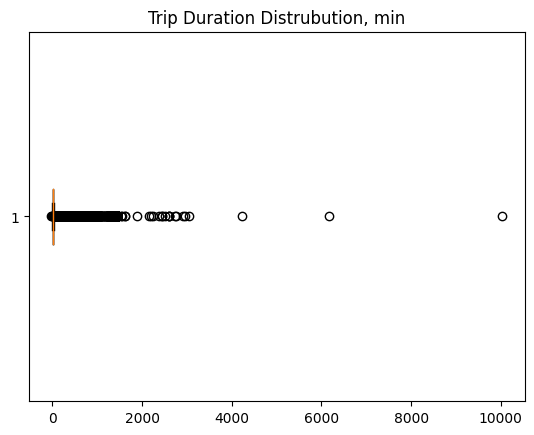

In [4]:
_ = plt.boxplot(df.duration, vert=False)
plt.title('Trip Duration Distrubution, min')
plt.show()

In [5]:
df[df['duration'].between(1, 60, inclusive='both')].shape[0]/df.shape[0]

0.9812202822125979

In [6]:
df = df[df['duration'].between(1, 60, inclusive='both')][['duration', 'PULocationID', 'DOLocationID', 'trip_distance']].copy()
df[['PULocationID', 'DOLocationID']] = df[['PULocationID', 'DOLocationID']].astype(str)

In [7]:
dv = DictVectorizer()
train_dict = df.drop(['duration', 'trip_distance'], axis=1).to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
y_train = df.duration.values

In [8]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [9]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

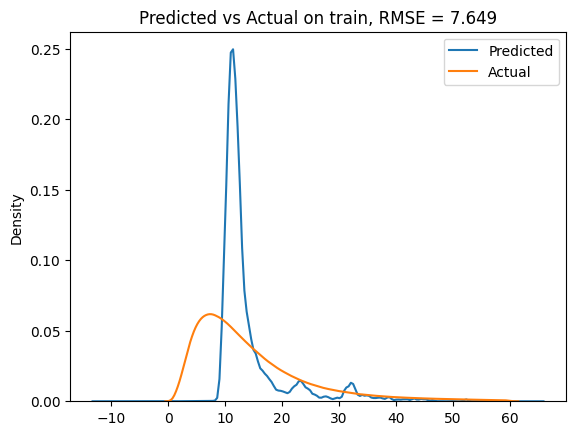

In [10]:
y_pred = l_reg.predict(X_train)

_ = sns.kdeplot(y_pred, label='Predicted')
_ = sns.kdeplot(y_train, label='Actual')

plt.legend()
plt.title(f'Predicted vs Actual on train, RMSE = {round(np.sqrt(mean_squared_error(y_train, y_pred)), 3)}')
plt.show()

In [11]:
df_test = pd.read_parquet('yellow_tripdata_2023-02.parquet')
df_test['duration'] = (df_test['tpep_dropoff_datetime'] - df_test['tpep_pickup_datetime']).apply(lambda x: x.total_seconds() / 60)
df_test[['PULocationID', 'DOLocationID']] = df_test[['PULocationID', 'DOLocationID']].astype(str)
df_test = df_test[df_test['duration'].between(1, 60, inclusive='both')][['duration', 'PULocationID', 'DOLocationID']].copy()
test_dict = df_test.drop(['duration'], axis=1).to_dict(orient='records')
X_test = dv.transform(test_dict)
y_test = df_test.duration.values

In [12]:
y_pred_test = l_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_test))

7.8118162035401735